In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV


In [2]:
df_train= pd.read_csv("/content/Train.csv")
df_test= pd.read_csv("/content/Test.csv")

In [3]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [6]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(),inplace=True)

In [7]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace=True)
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0],inplace=True)

In [8]:
df_train.duplicated().sum()

0

**EDA**


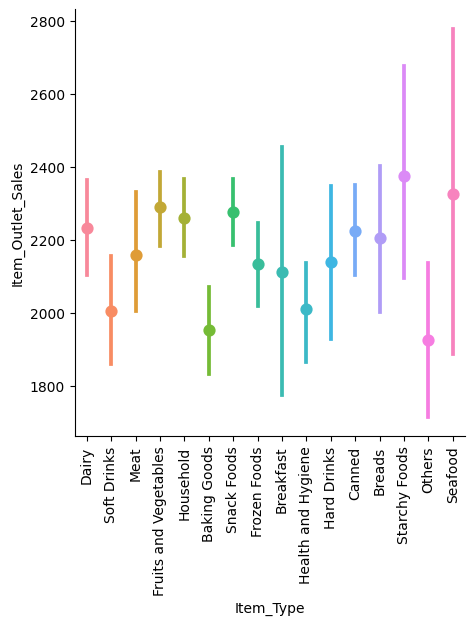

In [9]:
sns.catplot(x = 'Item_Type', y = 'Item_Outlet_Sales', data = df_train, kind = 'point', hue = 'Item_Type')
plt.xticks(rotation = 90)
plt.show()

<ipython-input-10-e8c64fd1d715>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(), annot = True);


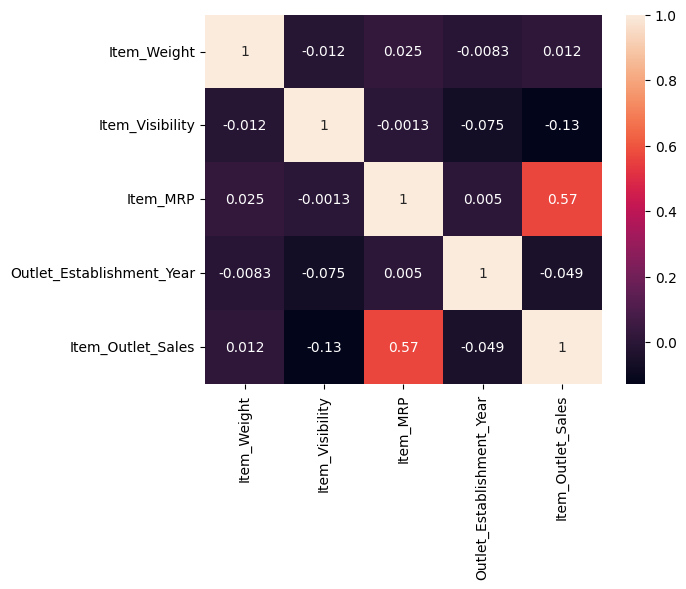

In [10]:
sns.heatmap(df_train.corr(), annot = True);

<Axes: xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

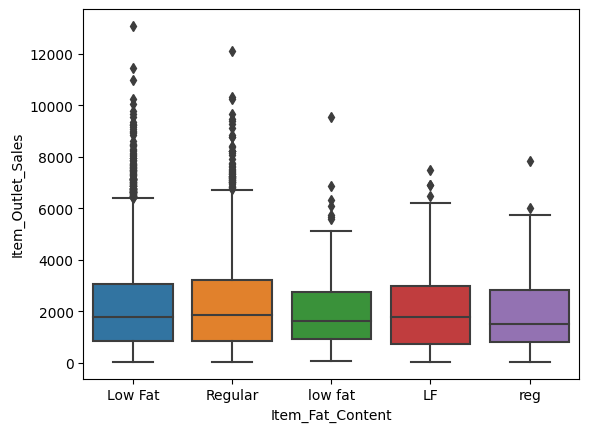

In [11]:
sns.boxplot(x = 'Item_Fat_Content', y = 'Item_Outlet_Sales', data=df_train)


Feature **Engnieering**

In [12]:
df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
df_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [13]:
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [14]:
le=LabelEncoder()

In [15]:
df_train = df_train.apply(le.fit_transform)
df_test = df_test.apply(le.fit_transform)

In [16]:
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,284,1,664,4,5592,4,1,0,1,2540
1,57,2,880,14,473,8,1,2,2,422
2,376,1,715,10,2901,4,1,0,1,1639
3,393,2,0,6,4227,3,1,2,0,670
4,265,1,0,9,627,1,0,2,1,865
...,...,...,...,...,...,...,...,...,...,...
8518,125,1,3912,13,4955,1,0,2,1,2047
8519,233,2,3278,0,2023,5,1,1,1,516
8520,299,1,2302,8,1263,6,2,1,1,1018
8521,149,2,7175,13,1857,8,1,2,2,1466


In [17]:
X=df_train.drop('Item_Outlet_Sales',axis=1)
Y=df_train['Item_Outlet_Sales']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=101, test_size=0.2)



In [18]:

reg = LinearRegression()
reg_model = reg.fit(X_train, Y_train)
lr_pred = reg.predict(X_test)

In [19]:

MSE=mean_squared_error(Y_test,lr_pred)
MAE=mean_absolute_error(Y_test,lr_pred)
r2=r2_score(Y_test,lr_pred)
RMSE = np.sqrt(MSE)
print("R squared value: ", r2)
print("Root Mean Squared Error : ", RMSE)
print("Mean Absolute Error : ", MAE)
reg_model.score

R squared value:  0.5451912823518803
Root Mean Squared Error :  613.7054601408788
Mean Absolute Error :  489.24876283012196


<bound method RegressorMixin.score of LinearRegression()>

In [20]:

rf = RandomForestRegressor()
rf.fit(X_train,Y_train)
RandomForestRegressor()
Y_pred_rf=rf.predict(X_test)
print("R squared value: ",r2_score(Y_test, Y_pred_rf))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(Y_test, Y_pred_rf)))
print("Mean Absolute Error : ",mean_absolute_error(Y_test, Y_pred_rf))


R squared value:  0.6130223494586757
Root Mean Squared Error :  566.0939829079915
Mean Absolute Error :  431.33534897360704


In [21]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=0)
gbr_model = gbr.fit(X_train, Y_train)
gbr_model_pred = gbr_model.predict(X_test)

In [22]:
MSE=mean_squared_error(Y_test,gbr_model_pred)
MAE=mean_absolute_error(Y_test,gbr_model_pred)
r2=r2_score(Y_test,gbr_model_pred)
RMSE = np.sqrt(MSE)
print("R squared value: ", r2)
print("Root Mean Squared Error : ", RMSE)
print("Mean Absolute Error : ", MAE)

R squared value:  0.6509039765233529
Root Mean Squared Error :  537.6727765953634
Mean Absolute Error :  408.78267769679064


In [23]:

# define models and parameters
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)

# define grid search
grid = dict(n_estimators=n_estimators, max_depth=max_depth,max_features=max_features, )

#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=101)

grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1,
                           scoring='r2',error_score=0,verbose=2,cv=2)

grid_search_forest.fit(X_train, Y_train)

# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

Fitting 2 folds for each of 270 candidates, totalling 540 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best: 0.659 using {'max_depth': 5, 'max_features': 'auto', 'n_estimators': 1000}
0.369 (0.010) with: {'max_depth': 1, 'max_features': 'auto', 'n_estimators': 10}
0.376 (0.005) with: {'max_depth': 1, 'max_features': 'auto', 'n_estimators': 100}
0.373 (0.007) with: {'max_depth': 1, 'max_features': 'auto', 'n_estimators': 1000}
0.230 (0.121) with: {'max_depth': 1, 'max_features': 'sqrt', 'n_estimators': 10}
0.266 (0.003) with: {'max_depth': 1, 'max_features': 'sqrt', 'n_estimators': 100}
0.269 (0.006) with: {'max_depth': 1, 'max_features': 'sqrt', 'n_estimators': 1000}
0.261 (0.003) with: {'max_depth': 1, 'max_features': 'log2', 'n_estimators': 10}
0.241 (0.027) with: {'max_depth': 1, 'max_features': 'log2', 'n_estimators': 100}
0.264 (0.003) with: {'max_depth': 1, 'max_features': 'log2', 'n_estimators': 1000}
0.547 (0.002) with: {'max_depth': 2, 'max_features': 'auto', 'n_estimators': 10}
0.543 (0.001) with: {'max_depth': 2, 'max_features': 'auto', 'n_estimators': 100}
0.543 (0.000) with

In [24]:
grid_search_forest.best_score_
Y_pred_rf_grid=grid_search_forest.predict(X_test)
r2_score(Y_test,Y_pred_rf_grid)

0.6531997956133933

In [25]:
import joblib
joblib.dump(grid_search_forest,'D:\Bigmart predtion analysis\random_forest_grid.sav')

['D:\\Bigmart predtion analysis\random_forest_grid.sav']

In [26]:
model=joblib.load('D:\Bigmart predtion analysis\random_forest_grid.sav')